In [1]:
##### HWK7: Scripting and Creating a 2D Sky Map

#### Name: Manish Mogan
#### UT EID: mm86873

#### Name: Ritesh Penumatsa
#### UT EID: rp37458

#### Date: 10/26/2025

In [2]:
## Step 1: Load CSV into Pandas DataFrame

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('bsc5.csv')

print(f"Total number of stars: {len(df)}")

Total number of stars: 9110


In [ ]:
### Sanity Checks

In [3]:
df.shape

(9110, 33)

In [4]:
df.head(5)

,HR,Name,DM,HD,SAO,FK5,IRFlag,Multiple,ADS,VarName,...,SpType,PMRA,PMDec,Parallax,RadVel,RotVel,DMag1,DMag2,Orbit,Notes
0,1,NaN,BD+44 4550,3.0,36042.0,NaN,NaN,NaN,46.0,NaN,...,A1Vn,-0.012,-0.018,NaN,-18.0,195.0,4.2,21.0,6.0,AC 3
1,2,NaN,BD-01 4525,6.0,128569.0,NaN,NaN,NaN,NaN,NaN,...,gG9,0.045,-0.060,NaN,14.0,NaN,NaN,NaN,NaN,NaN
2,3,33 Psc,BD-06 6357,28.0,128572.0,1002.0,I,NaN,NaN,Var?,...,K0IIIbCN-0.5,-0.009,0.089,0.014,-6.0,17.0,2.5,0.0,0.0,3
3,4,86 Peg,BD+12 5063,87.0,91701.0,2004.0,NaN,NaN,NaN,NaN,...,G5III,0.045,-0.012,NaN,-2.0,NaN,NaN,NaN,NaN,NaN
4,5,NaN,BD+57 2865,123.0,21085.0,NaN,NaN,NaN,61.0,V640 Cas,...,G5V,0.263,0.030,0.047,-12.0,NaN,0.8,1.0,4.0,NaN


In [5]:
df.tail(5)

,HR,Name,DM,HD,SAO,FK5,IRFlag,Multiple,ADS,VarName,...,SpType,PMRA,PMDec,Parallax,RadVel,RotVel,DMag1,DMag2,Orbit,Notes
9105,9106,NaN,CP-73 2346,225233.0,255629.0,NaN,NaN,NaN,NaN,NaN,...,F2V,0.010,-0.054,NaN,8.0,NaN,NaN,NaN,NaN,NaN
9106,9107,NaN,BD+33 4828,225239.0,53622.0,2002.0,NaN,NaN,NaN,NaN,...,G2V,0.772,0.089,0.035,4.0,NaN,NaN,NaN,NaN,NaN
9107,9108,NaN,CP-72 2800,225253.0,255631.0,1001.0,NaN,NaN,NaN,NaN,...,B8IV-V,0.028,-0.014,NaN,-3.0,NaN,NaN,NaN,NaN,NaN
9108,9109,NaN,BD+25 5068,225276.0,73731.0,NaN,I,NaN,42.0,NaN,...,K4IIIb,0.110,-0.012,NaN,-5.0,NaN,4.5,17.0,5.0,NaN
9109,9110,NaN,BD+60 2667,225289.0,10962.0,NaN,NaN,NaN,NaN,V567 Cas,...,B8IVpHgMn,0.015,0.005,NaN,14.0,50.0,NaN,NaN,NaN,NaN


In [6]:
df.describe()

,HR,HD,SAO,FK5,ADS,RAh,RAm,RAs,DecD,DecM,...,UB,RI,PMRA,PMDec,Parallax,RadVel,RotVel,DMag1,DMag2,Orbit
count,9110.00000,9096.000000,9071.000000,3077.000000,1435.000000,9096.000000,9096.000000,9096.000000,9096.000000,9096.000000,...,7206.000000,2551.000000,9096.000000,9096.000000,3289.000000,9092.000000,3933.000000,2890.000000,2951.000000,2876.000000
mean,4555.50000,107334.581794,134193.509536,1954.447514,8278.804878,11.547274,29.765501,30.171284,33.916996,29.692062,...,0.374167,0.368491,0.001827,-0.019225,0.024512,0.593049,87.736079,3.537024,38.053880,3.955841
std,2629.97481,67739.321279,75516.511021,1209.016612,4700.699670,6.790622,17.197686,17.249091,21.235014,17.271153,...,0.804599,0.458768,0.163218,0.138356,0.032329,23.635129,83.446089,2.788965,70.576585,2.867957
min,1.00000,3.000000,106.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.110000,-0.530000,-3.646000,-5.813000,-0.032000,-140.000000,0.000000,0.000000,0.000000,0.000000
25%,2278.25000,44330.500000,71659.000000,820.000000,4154.500000,6.000000,15.000000,15.700000,16.000000,15.000000,...,-0.080000,0.020000,-0.024000,-0.031000,0.009000,-14.000000,19.000000,1.000000,1.000000,1.000000
50%,4555.50000,103449.500000,131443.000000,2104.000000,8406.000000,11.000000,30.000000,30.400000,33.000000,30.000000,...,0.100000,0.310000,-0.002000,-0.008000,0.018000,0.000000,60.000000,3.200000,10.000000,4.000000
75%,6832.75000,167648.750000,200666.500000,3046.000000,11822.500000,18.000000,45.000000,44.900000,50.000000,45.000000,...,0.880000,0.570000,0.020000,0.007000,0.032000,15.000000,132.000000,5.700000,41.500000,6.000000
max,9110.00000,225289.000000,258996.000000,3997.000000,17175.000000,23.000000,59.000000,59.900000,89.000000,59.000000,...,7.400000,3.710000,4.136000,3.208000,0.751000,289.000000,455.000000,13.800000,1480.000000,9.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9110 entries, 0 to 9109
Data columns (total 33 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   HR        9110 non-null   int64  
 1   Name      3157 non-null   object 
 2   DM        9096 non-null   object 
 3   HD        9096 non-null   float64
 4   SAO       9071 non-null   float64
 5   FK5       3077 non-null   float64
 6   IRFlag    1743 non-null   object 
 7   Multiple  1577 non-null   object 
 8   ADS       1435 non-null   float64
 9   VarName   2182 non-null   object 
 10  RAh       9096 non-null   float64
 11  RAm       9096 non-null   float64
 12  RAs       9096 non-null   float64
 13  DecSign   9096 non-null   object 
 14  DecD      9096 non-null   float64
 15  DecM      9096 non-null   float64
 16  DecS      9096 non-null   float64
 17  GLON      9096 non-null   float64
 18  GLAT      9096 non-null   float64
 19  Vmag      9096 non-null   float64
 20  BV        8786 non-null   floa

In [ ]:
## Step 3: Convert RA and Dec to Decimal Degrees

In [8]:
df['RAh'] = pd.to_numeric(df['RAh'], errors='coerce').fillna(0)
df['RAm'] = pd.to_numeric(df['RAm'], errors='coerce').fillna(0)
df['RAs'] = pd.to_numeric(df['RAs'], errors='coerce').fillna(0)

df['ra_deg'] = (df['RAh'] + df['RAm']/60.0 + df['RAs']/3600.0) * 15.0

df['DecD'] = pd.to_numeric(df['DecD'], errors='coerce').fillna(0)
df['DecM'] = pd.to_numeric(df['DecM'], errors='coerce').fillna(0)
df['DecS'] = pd.to_numeric(df['DecS'], errors='coerce').fillna(0)

df['dec_deg'] = df['DecD'] + df['DecM']/60.0 + df['DecS']/3600.0
df.loc[df['DecSign'] == '-', 'dec_deg'] = -df.loc[df['DecSign'] == '-', 'dec_deg']

print("RA and Dec converted to decimal degrees")
print(f"\nSample values:")
print(df[['RAh', 'RAm', 'RAs', 'ra_deg', 'DecSign', 'DecD', 'DecM', 'DecS', 'dec_deg']].head())

RA and Dec converted to decimal degrees

Sample values:
   RAh  RAm   RAs    ra_deg DecSign  DecD  DecM  DecS    dec_deg
0  0.0  5.0   9.9  1.291250       +  45.0  13.0  45.0  45.229167
1  0.0  5.0   3.8  1.265833       -   0.0  30.0  11.0  -0.503056
2  0.0  5.0  20.1  1.333750       -   5.0  42.0  27.0  -5.707500
3  0.0  5.0  42.0  1.425000       +  13.0  23.0  46.0  13.396111
4  0.0  6.0  16.0  1.566667       +  58.0  26.0  12.0  58.436667


In [ ]:
## Step 4: Assign Colors by Spectral Type

In [9]:
def get_star_color(sptype):
    if pd.isna(sptype) or sptype == '':
        return 'black'
    
    first_char = str(sptype).strip()[0].upper()
    
    color_map = {
        'O': '#4B0082',
        'B': '#0000FF',
        'A': '#87CEEB',
        'F': '#00FF00',
        'G': '#FFFF00',
        'K': '#FFA500',
        'M': '#FF0000',
    }
    
    return color_map.get(first_char, 'black')

df['color'] = df['SpType'].apply(get_star_color)

print("Color distribution by spectral type:")
print(df['color'].value_counts())

Color distribution by spectral type:
color
#FFA500    2065
#87CEEB    1963
#0000FF    1757
#FFFF00    1405
#00FF00    1287
#FF0000     506
black        76
#4B0082      51
Name: count, dtype: int64


In [ ]:
## Step 5a: All-Sky Map in Equatorial Coordinates

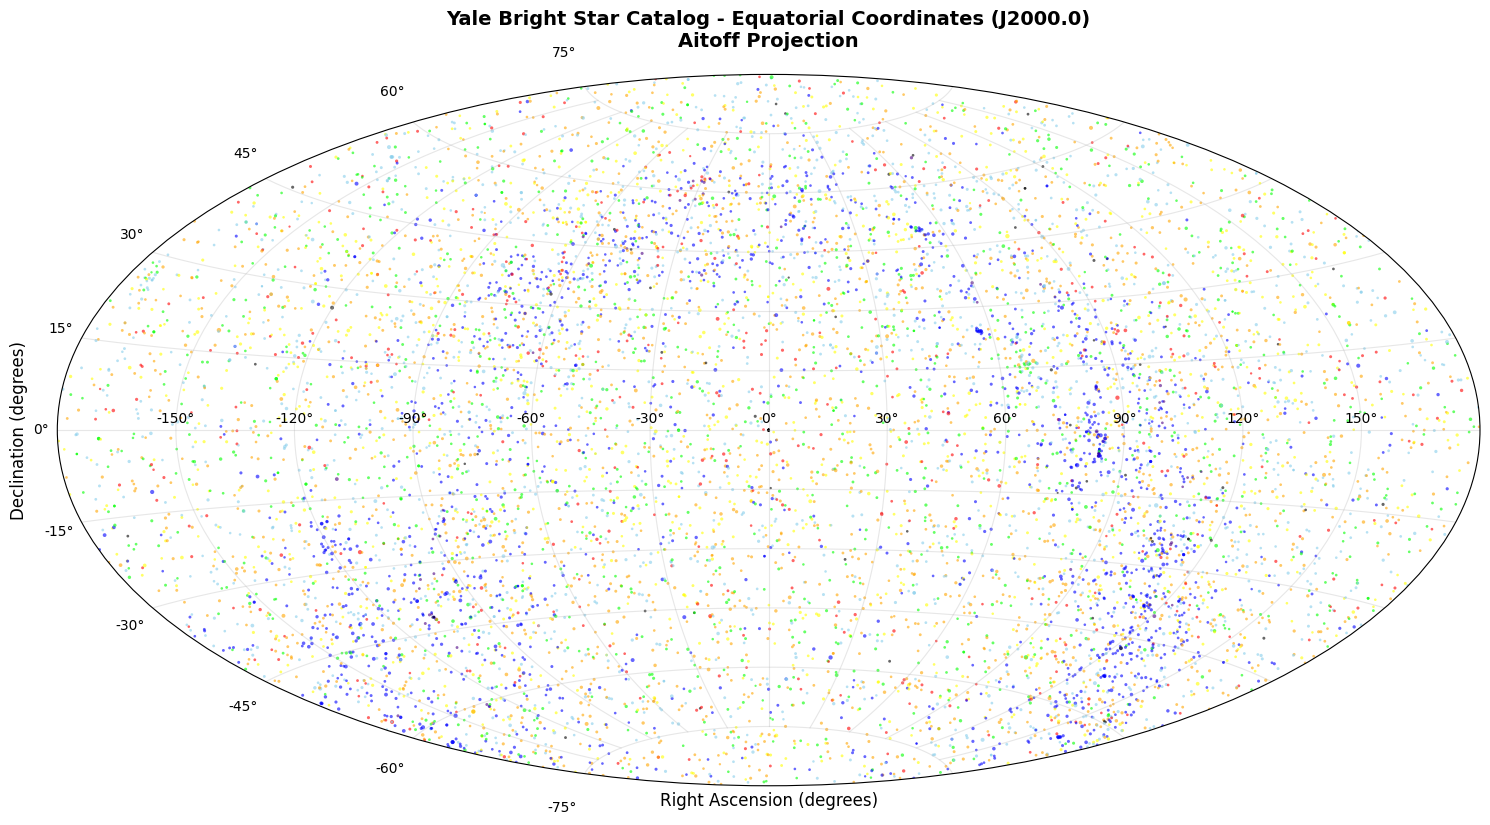

Plotted 9110 stars in equatorial coordinates


In [10]:
df_valid = df[(df['ra_deg'] >= 0) & (df['ra_deg'] <= 360) & 
              (df['dec_deg'] >= -90) & (df['dec_deg'] <= 90)].copy()

ra_plot = df_valid['ra_deg'].copy()
ra_plot[ra_plot > 180] = ra_plot[ra_plot > 180] - 360

ra_rad = np.radians(ra_plot)
dec_rad = np.radians(df_valid['dec_deg'])

fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111, projection='aitoff')

sizes = 10 - df_valid['Vmag'].fillna(6).astype(float).clip(0, 10)

scatter = ax.scatter(ra_rad, dec_rad, 
                    c=df_valid['color'], 
                    s=sizes, 
                    alpha=0.6, 
                    edgecolors='none')

ax.set_xlabel('Right Ascension (degrees)', fontsize=12)
ax.set_ylabel('Declination (degrees)', fontsize=12)
ax.set_title('Yale Bright Star Catalog - Equatorial Coordinates (J2000.0)\nAitoff Projection', 
            fontsize=14, fontweight='bold', pad=20)

ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Plotted {len(df_valid)} stars in equatorial coordinates")

In [ ]:
## Step 5b: Create All-Sky Map in Galactic Coordinates

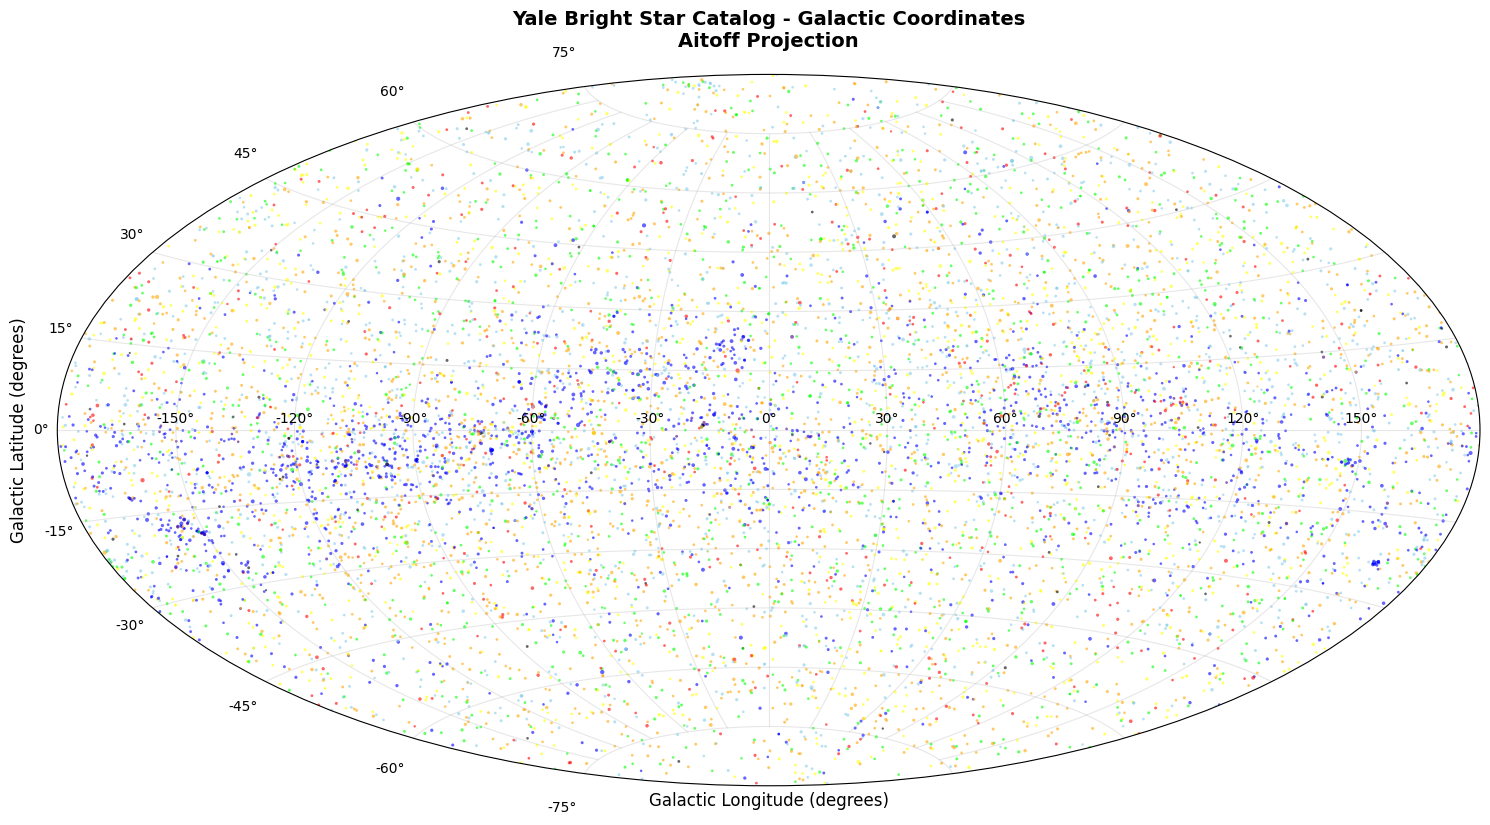

Plotted 9096 stars in galactic coordinates


In [11]:
df_valid['GLON'] = pd.to_numeric(df_valid['GLON'], errors='coerce')
df_valid['GLAT'] = pd.to_numeric(df_valid['GLAT'], errors='coerce')

df_galactic = df_valid[(df_valid['GLON'].notna()) & (df_valid['GLAT'].notna())].copy()

glon_plot = df_galactic['GLON'].copy()
glon_plot[glon_plot > 180] = glon_plot[glon_plot > 180] - 360

glon_rad = np.radians(glon_plot)
glat_rad = np.radians(df_galactic['GLAT'])

fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111, projection='aitoff')

sizes = 10 - df_galactic['Vmag'].fillna(6).astype(float).clip(0, 10)

scatter = ax.scatter(glon_rad, glat_rad, 
                    c=df_galactic['color'], 
                    s=sizes, 
                    alpha=0.6, 
                    edgecolors='none')

ax.set_xlabel('Galactic Longitude (degrees)', fontsize=12)
ax.set_ylabel('Galactic Latitude (degrees)', fontsize=12)
ax.set_title('Yale Bright Star Catalog - Galactic Coordinates\nAitoff Projection', 
            fontsize=14, fontweight='bold', pad=20)

ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Plotted {len(df_galactic)} stars in galactic coordinates")

In the equatorial map, the stars look more evenly spread around the sky. This system is lined up with Earth’s equator, so it’s good for finding things as the Earth turns.

In the galactic map, you see a thick band across the middle. That band is the Milky Way, our galaxy. Lots of stars crowd along this band, and there are fewer stars far above or below it. So the galactic map shows the shape of our galaxy, while the equatorial map is better for everyday sky directions.